In [3]:
import numpy as np
import pandas as pd

dataframe_train = pd.read_csv ("train.csv")
dataframe_train.describe()
#dataframe_train.isnull().values.any()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,target
count,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,...,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000,6963.000000
mean,-0.008188,0.046069,0.084133,-0.034631,-0.014021,1.537025,0.115259,-0.086073,0.029376,0.241310,...,-0.097963,0.025496,0.029191,-0.009160,0.003571,0.158798,0.064066,-0.205739,-0.122300,0.287233
std,3.057552,6.858400,2.695550,2.765791,7.261945,0.441206,2.762552,2.742284,2.748676,5.454805,...,2.911122,6.131952,7.884183,2.725234,2.752172,5.803769,2.779181,6.522376,6.802771,0.452503
min,-11.852801,-27.841715,-10.613443,-10.931017,-28.752811,1.000020,-10.311434,-10.075589,-10.141371,-19.277277,...,-10.638970,-28.953492,-33.201209,-11.850828,-9.478779,-20.325866,-9.926252,-28.539398,-28.483072,0.000000
25%,-2.062561,-4.317894,-1.740497,-1.896934,-4.743647,1.189318,-1.703177,-1.950722,-1.846900,-3.445588,...,-2.078737,-3.974946,-5.151041,-1.844369,-1.902487,-3.784460,-1.790703,-4.666848,-4.573261,0.000000
50%,-0.017501,-0.053759,0.084710,-0.075840,-0.091840,1.414150,0.143693,-0.063503,0.063927,0.261190,...,-0.088714,-0.008010,-0.050073,-0.007633,-0.007796,0.166533,0.027659,-0.234126,-0.093245,0.000000
75%,1.991994,4.245097,1.921483,1.777565,4.788682,1.759918,1.964735,1.786275,1.892030,3.906689,...,1.921656,4.007312,5.322672,1.840979,1.833849,4.026855,1.931042,4.296710,4.339118,1.000000
max,12.902967,34.619762,9.492417,11.881847,26.337084,2.717640,10.887146,10.071861,10.213687,21.919386,...,11.498217,26.914131,36.333892,9.047867,11.195738,22.448674,9.925644,27.139111,26.071364,1.000000


In [4]:
#normalized_df=(dataframe_train-dataframe_train.min())/(dataframe_train.max()-dataframe_train.min())
#normalized_dataframe_train['target'] = dataframe_train['target']
#normalized_dataframe_train.describe()

normalized_dataframe_train = dataframe_train

In [92]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(normalized_dataframe_train.iloc[:,:31], normalized_dataframe_train['target'], test_size=0.2,random_state = 0)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
#print (x_train.std())
#print (x_test.std())


(5570, 31) (5570,)
(1393, 31) (1393,)


In [138]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


inputs = keras.Input(shape=(31,))

dense = layers.Dense(32, activation="relu")
x = dense(inputs)


outputs = layers.Dense(1, activation='sigmoid')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="binary_classifier_med")
model.summary()

Model: "binary_classifier_med"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 31)]              0         
                                                                 
 dense_58 (Dense)            (None, 32)                1024      
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [139]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="binary_crossentropy",
),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)


from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = model.fit(x_train, y_train, batch_size = 64, 
                    epochs = 60, validation_data =(x_test, y_test), 
                    callbacks =[earlystopping])

Epoch 1/60
88/88 [==============================] - 1s 5ms/step - loss: 0.7281 - accuracy: 0.6890 - val_loss: 0.5203 - val_accuracy: 0.7473
Epoch 2/60
88/88 [==============================] - 0s 4ms/step - loss: 0.4362 - accuracy: 0.7977 - val_loss: 0.3646 - val_accuracy: 0.8435
Epoch 3/60
88/88 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8695 - val_loss: 0.2936 - val_accuracy: 0.8844
Epoch 4/60
88/88 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.9022 - val_loss: 0.2464 - val_accuracy: 0.8981
Epoch 5/60
88/88 [==============================] - 0s 3ms/step - loss: 0.2141 - accuracy: 0.9230 - val_loss: 0.2087 - val_accuracy: 0.9146
Epoch 6/60
88/88 [==============================] - 0s 3ms/step - loss: 0.1850 - accuracy: 0.9330 - val_loss: 0.1923 - val_accuracy: 0.9232
Epoch 7/60
88/88 [==============================] - 0s 3ms/step - loss: 0.1638 - accuracy: 0.9406 - val_loss: 0.1727 - val_accuracy: 0.9354
Epoch 8/60
88/88 [==

In [140]:
from sklearn import metrics

y_pred = model.predict(x_test, batch_size=64, verbose=0)
y_pred_bool = (y_pred > .5).astype(int)
np.shape(y_pred_bool), np.shape(y_test)
metrics.f1_score(y_test, y_pred_bool, average='weighted')

0.9820171958477392

In [141]:
dataframe_test = pd.read_csv ("test.csv")
#normalized_df=(dataframe_test-dataframe_test.min())/(dataframe_test.max()-dataframe_test.min())
normalized_dataframe_test = dataframe_test

x_pred = normalized_dataframe_test.values.tolist()

y_pred = model.predict(normalized_dataframe_test)
Y = (y_pred > .5).astype(int)
print(np.shape(Y))
np.savetxt('pred.csv',Y, fmt='%d',header='target')



123/123 [==============================] - 0s 1ms/step
(3920, 1)


<AxesSubplot:>

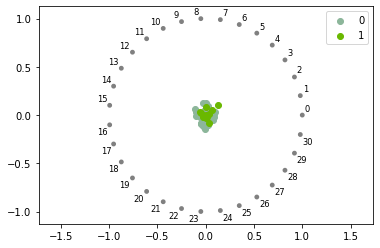

In [142]:
import matplotlib.pyplot as plt
from pandas.plotting import radviz
plt.figure()

radviz(dataframe_train.iloc[1:40,], 'target')

In [143]:
from RadViz.main import RadViz2D
from RadViz.main import RadViz3D
import time
import plotly.io as pio
pio.renderers.default='iframe'

BPs=10000
time_start = time.time()
y=dataframe_train['target']
X=dataframe_train.drop(['target'], axis=1)
RadViz3D(y,X,BPs)
print( 'RadViz3D done! Time elapsed: {} seconds'.format(time.time()-time_start))

RadViz3D done! Time elapsed: 0.19801998138427734 seconds


In [144]:
BPs=10000
time_start = time.time()
dataframe_test['target'] = Y
y=dataframe_test['target']
X=dataframe_test.drop(['target'], axis=1)
RadViz3D(y,X,BPs)
print( 'RadViz3D done! Time elapsed: {} seconds'.format(time.time()-time_start))

RadViz3D done! Time elapsed: 0.16303539276123047 seconds
